In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#create data frame to read csv 
df= pd.read_csv('train.csv',na_values="na")

In [3]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [4]:
df.isnull().sum()

class         0
aa_000        0
ab_000    27896
ac_000     2141
ad_000     9200
          ...  
ee_007      379
ee_008      379
ee_009      379
ef_000     1730
eg_000     1729
Length: 171, dtype: int64

In [5]:
df.shape

(36188, 171)

In [6]:
#Count of pos and neg values in column Class

df['class'].value_counts()
        

class
neg    35188
pos     1000
Name: count, dtype: int64

In [7]:
# This gives a class imbalance
# Null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 47.2+ MB


In [9]:
#Count of Numerical and Categorical columns from the dataset

numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [10]:
len(numerical_columns)

170

In [11]:
len(categorical_columns)

1

In [12]:
#Checking the missing the values

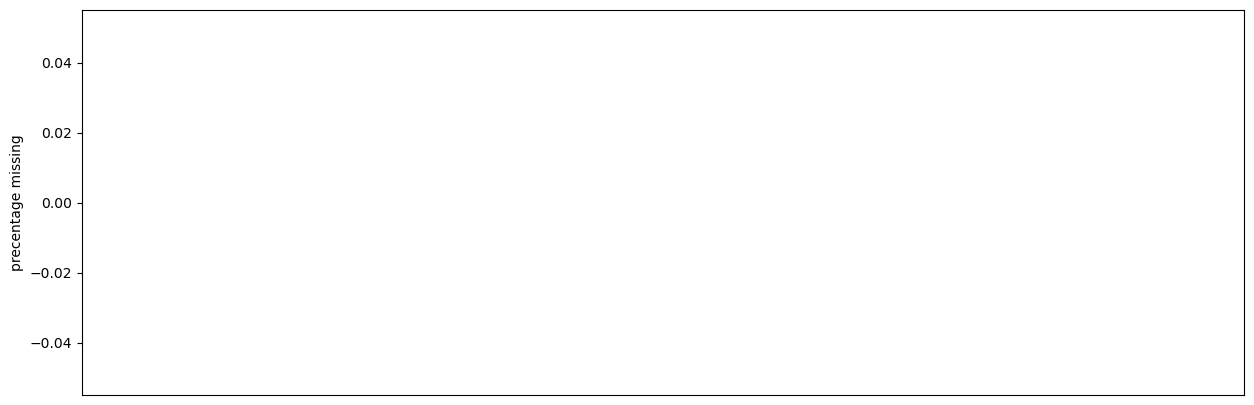

In [13]:
missing=(df.isnull().sum()/df.shape[0])*100
missing.to_frame().sort_values(by =0,ascending=False)
fig,ax=plt.subplots(figsize=(15,5))
ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("precentage missing")
plt.show()

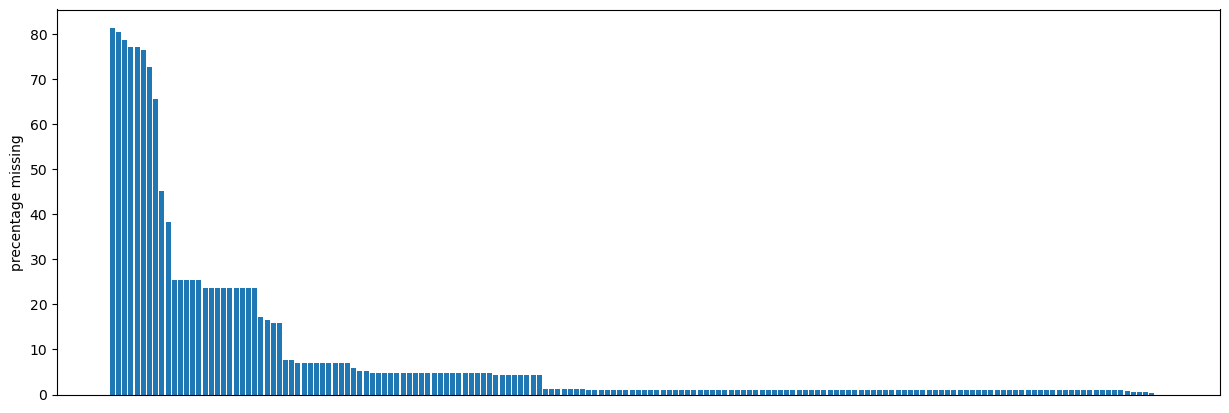

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending=False)

                                                                           
ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("precentage missing")
plt.show()

In [15]:
#Thumb rule

# delete the column if 70% of the data are missing
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [16]:
# droping the columns from the main dataset
df.drop(list(dropcols.index),axis=1,inplace=True)

In [17]:
df.shape

(36188, 164)

In [18]:
#find out total missing values of an entire dataset
total_missing=df.isna().sum().sum()
total_cells = np.product(df.shape)

In [19]:
(total_missing/total_cells)*100

5.37059852747306

In [20]:
# find out the total missing values of a dataset

missing_value_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_value_count.sum()

print(f"precentage of missing data for entire dataset is {(total_missing/total_cells)*100} %")

precentage of missing data for entire dataset is 5.37059852747306 %


C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


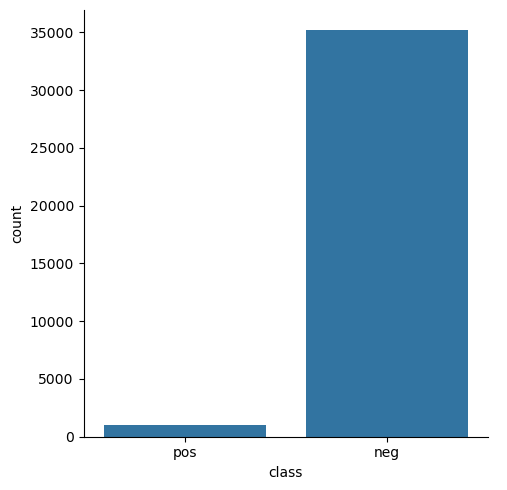

In [21]:
#Visulaising class imbalance
pos=df[df["class"]=="pos"].shape[0]
neg=df[df["class"]=="neg"].shape[0]
sns.catplot(data=df,x="class",kind="count")

In [22]:
#Splitting the data
x=df.drop("class",axis=1)
y=df["class"]

In [23]:
y

0        pos
1        pos
2        pos
3        pos
4        pos
        ... 
36183    neg
36184    neg
36185    neg
36186    neg
36187    neg
Name: class, Length: 36188, dtype: object

In [24]:
y=y.replace({"pos":1,"neg":0})


In [25]:
y

0        1
1        1
2        1
3        1
4        1
        ..
36183    0
36184    0
36185    0
36186    0
36187    0
Name: class, Length: 36188, dtype: int64

In [27]:
x

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,153204,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,11804.0,684444.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,453236,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,323436.0,2999280.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,72504,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,3813464.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,762958,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,8123016.0,18022646.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,695994,NaN,NaN,NaN,NaN,0.0,0.0,0.0,55620.0,1190014.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

robust_scaler = RobustScaler()
X1 = robust_scaler.fit_transform(x)

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from statistics import mean

In [29]:
 results = []
neig_knn = [4]
for k in neig_knn:
    pipeline = Pipeline(steps=[("imputer", KNNImputer(n_neighbors=k)),
                               ("model", LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring="accuracy", cv=2, n_jobs=-1)
    results.append(scores)
    print(f"n_neighbours = {k} || accuracy = {mean(scores)}")

n_neighbours = 4 || accuracy = 0.7439482701447995


In [27]:
    
# pipeline for KNN imputer with Robust scaler
knn_pipeline = Pipeline(steps=[
    ("imputer", KNNImputer(n_neighbors=4)),
    ("Robust", RobustScaler())
])

X_knn = knn_pipeline.fit_transform(x)

In [31]:
X_knn


array([[ 2.48316651e+00,  2.99401198e-03,  1.93277311e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.58106804e+00,  2.05688623e+00,  2.17752101e+00, ...,
         3.45700000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.43005945e-01,  1.05988024e+00,  1.63550420e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-6.28301407e-01,  1.59484001e+06, -5.36764706e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00129058e+00,  1.59484001e+06,  4.63235294e-01, ...,
         1.94211000e+02,  0.00000000e+00,  0.00000000e+00],
       [ 1.86901072e-01,  3.89221557e-01,  7.44747899e-01, ...,
         7.90000000e-02,  0.00000000e+00,  0.00000000e+00]])

In [34]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install --upgrade scikit-learn imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [28]:
#balance the data
from imblearn.combine import SMOTETomek
smt=SMOTETomek(random_state=42,sampling_strategy='minority')
x_res,y_res=smt.fit_resample(X_knn,y)


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random forest" : RandomForestClassifier(),
    "Decision tree" : DecisionTreeClassifier(),
    "logisitic Regression" : LogisticRegression(),
    "knn classifier" : KNeighborsClassifier(),
    "xgb" : XGBClassifier()
}

In [44]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
                            confusion_matrix


def evaluate_clf(true, predicted):
    
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)    
    pre = precision_score(true, predicted)    
    recall = recall_score(true, predicted)    
    roc = roc_auc_score(true, predicted)  
    
    return acc, f1, pre, recall, roc

def total_cost(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    
    return cost

In [51]:
from sklearn.model_selection import train_test_split

def evaluate_model(X, y, models):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    cost_list = []
    model_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # training the model
        
        # make prediction
        y_test_pred = model.predict(X_test)
        
        acc, f1, pre, recall, roc = evaluate_clf(y_test, y_test_pred)
        
        # calculate the cost
        test_cost = total_cost(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])
        
        print("Model performance for test Set")
        print(f"- Accuracy: {acc}")
        print(f"- f1 score: {f1}")        
        print(f"- precision score: {pre}")        
        print(f"- Recall: {recall}")        
        print(f"- roc: {roc}")
        print(f"- total cost : {test_cost}")
        
        cost_list.append(test_cost)
        
        print("="*35)
        print("\n")
        
        report = pd.DataFrame(list(zip(model_list, cost_list)), 
                               columns=["Model Name", 'Cost']).sort_values(by=["Cost"])
                          
        return report

In [55]:
report_knn=evaluate_model(x_res,y_res,models)

Random forest
Model performance for test Set
- Accuracy: 0.9918067825591337
- f1 score: 0.9918026944187042
- precision score: 0.987649063032368
- Recall: 0.9959914101646385
- roc: 0.9918263673997211
- total cost : 14870




In [54]:
report_knn

,Model Name,Cost
0,Random forest,15350
